# **Linear Regression**

#### **Basic Linear Regression with SciPy**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

m=[1.93939394]
b=[4.73333333]


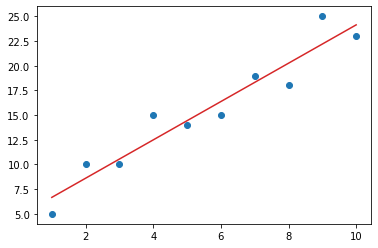

In [ ]:
df = pd.read_csv('https://bit.ly/3goOAnt',delimiter=",")
X = df.values[:,:-1]
Y = df.values[:,-1]
fit = LinearRegression().fit(X,Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m={0}".format(m))
print("b={0}".format(b))
plt.plot(X,Y,'o')
plt.plot(X, m*X+b,color='C3')
plt.show()

#### **Residuals and Squared Errors**
---
Residuals are the numeric difference between the point and the line.
Points above the line have positive residuals and points below the line have negative residuals. In other words:
\begin{equation}
R=y_{pred} - y_{actual}
\end{equation}
Another name for Residuals are $errors$. Because they reflect how wrong or right our line is in predicting the data. Let's compute residuals from the example above.

In [ ]:
points = pd.read_csv('https://bit.ly/3goOAnt',delimiter=",").itertuples() # Import just the points in tuples so that each point= Pandas(index, x,y)

m=1.93939394
b=4.73333333

for p in points:
  y_actual = p.y 
  y_predict = m*p.x + b
  residual = y_actual - y_predict 
  print(residual)

-1.6727272699999993
1.3878787900000003
-0.5515151500000002
2.509090910000001
-0.43030303000000103
-1.3696969699999997
0.6909090900000017
-2.2484848500000005
2.812121210000001
-1.1272727300000014


Usually what's done is Called $\text{R-squared error}$  
by summing up the Residuals after squaring the differences.

\begin{equation}
R^2 = \sum_{i=0}^{n} (y_{i_{pred}} - y_{i_{actual}})^2
\end{equation}


In [ ]:
points = pd.read_csv('https://bit.ly/3goOAnt',delimiter=",").itertuples() # Import just the points in tuples so that each point= Pandas(index, x,y)
m=1.93939394
b=4.73333333
sum_of_squares=0.0
for p in points:
  y_actual = p.y 
  y_predict = m*p.x + b
  residual_squared = (y_actual - y_predict)**2
  sum_of_squares+= residual_squared
print(sum_of_squares)

28.096969696969715


How do we find $m$ and $b$ values that will produce the minimum sum of squares, without using a library like scikit-learn. 

### **Finding the Best Fit Line**
---

We have to minimize $R^2$ in order to get a best fitted line across the collection of points.

Five techniques can be used to find best fit:
1. closed form
2. matrix inversion
3.  matrix decomposition
4. gradient descent
5. stochastic gradient descent

<p align="center"><strong>Machine Learning Training is fitting a Regression </strong></p>

---

This is the heart of "training" a machine learning algorithm. We provide some data and an objective function (sum of squares) and it will find the right coefficients $m$ and $b$ to fulfill that objective. So when we "train" a machine learning model we are minimizing a loss function. 

####**Closed Form Equation**

Some readers may ask if there is a formula (called a closed form equation) to fit a linear regression by exact calculation. Yes, but only a simple linear regression with one input variable.
For a simple linear regression with only one input and one output variable, here are the closed form equations to calculate m and b. (We can't do this for multiple input variables and a large amount of data)

\begin{equation}
m = \frac{n\sum{xy} - \sum{x}\sum{y}}{n\sum{x^2} - (\sum{x})^2}\\
\\
\\
b = \frac{\sum{y}}{n} - m\frac{\sum{x}}{n}
\end{equation}

In [ ]:
points = list(pd.read_csv('https://bit.ly/2KF29Bd',delimiter=",").itertuples())
n = len(points)
m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points)) / (n* sum(p.x**2 for p in points) - sum(p.x for p in points)**2)
b = (sum(p.y for p in points)/n) - m*(sum(p.x for p in points)/n)
print(m,b)

1.9393939393939394 4.7333333333333325


#### **Inverse Matrix Techniques**
---
Professional world conventions for $m$ and $b$ are:

$m,b$ = $β_1, β_0$

$b = (X^T ⋅ X)^{-1} ⋅ X^T ⋅ y$

In [ ]:
from numpy.linalg  import inv 
import numpy as np
df = pd.read_csv('https://bit.ly/3goOAnt',delimiter=",")
X = df.values[:,:-1].flatten()
X_1= np.vstack([X,np.ones(len(X))]).T
Y = df.values[:,-1]
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(b)
y_predict = X_1.dot(b)

[1.93939394 4.73333333]


#### **Gradient Descent**


For a function $f(x) = (x-3)^2 + 4$ 

Let's find out the $m$ and $b$ (or $β_0$ and $β_1$ ).

In [ ]:
from sympy import *
x = symbols('x')
f = (x -3)**2 +4
# calculate the derivative of the function
dx_f= diff(f) #diff is the differenciation
# print(dx_f)
dx_f

2*x - 6

In [ ]:
import random 
L=0.001
iterations=100
def f(x):
  return (x-3)**2 + 4
def dx_f(x):
  return 2*(x-3)
x = random.randint(-15,15)
for i in range(iterations):
  d_x = dx_f(x)
  x -= L * d_x
print(x,f(x))

5.455700414065283 10.0304645236404


#### **Gradient Descent and Linear Regression**
---

In [ ]:
import pandas as pd

points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

m=0.0
b=0.0

L= 0.001

iterations = 100_000
n = float(len(points))

for i in range(iterations):
  #slope with respect to m
  D_m=sum(2*p.x*((m*p.x+b)-p.y) for p in points) 
  #slope with respect to b
  D_b = sum(2*((m*p.x+b)-p.y) for p in points)
  #update m and b
  m-=L * D_m
  b-=L * D_b
print(f"y={m}x+{b}")

y=1.9393939393939548x+4.733333333333227


In [ ]:
#sympy solution

from sympy import *
m, b, i, n = symbols('m b i n')
x_i,y_i=symbols('x_i y_i')
sum_of_squares=Sum((m*x_i+b - y_i)**2,(i, 0 ,n))
d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)
print(d_m)
print(d_b)

Sum(2*x_i*(b + m*x_i - y_i), (i, 0, n))
Sum(2*b + 2*m*x_i - 2*y_i, (i, 0, n))


In [ ]:
d_m

Sum(2*x_i*(b + m*x_i - y_i), (i, 0, n))

In [ ]:
d_b

Sum(2*b + 2*m*x_i - 2*y_i, (i, 0, n))

* Derivative of sum of squares with respect to m is the slope against m.
* Derivative of sum of squares with respect to b is the slope against b.

* Update of $m$:
\begin{equation}
m_\text{ updated}= m_\text{ previous} - \left(α×\frac{d}{dm}e(x)\right)
\end{equation}
* Update of $b$:
\begin{equation}
b_\text{ updated}= b_\text{ previous}-\left(α×\frac{d}{db}e(x)\right)
\end{equation}



In [ ]:
from sympy import *
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
m, b, i, n = symbols('m b i n')
x,y=symbols('x y',cls=Function)
sum_of_squares=Sum((m*x(i)+b - y(i))**2,(i, 0 ,n))
d_m = diff(sum_of_squares, m)\
.subs(n,len(points)-1).doit()\
.replace(x,lambda i:points[i].x)\
.replace(y,lambda i:points[i].y)

d_b = diff(sum_of_squares, b)\
.subs(n,len(points)-1).doit()\
.replace(x,lambda i:points[i].x)\
.replace(y,lambda i:points[i].y)

In [ ]:
#compile using lambdify for faster computation
d_m = lambdify([m,b],d_m)
d_b = lambdify([m,b],d_b)
# building the model
m=0.0
b=0.0
#learning rate
L= 0.001

iterations = 100_000

#perform gradient descent
for i in range(iterations):
  #update m and b
  m-=L * d_m(m,b)
  b-=L * d_b(m,b)
print(f"y={m}x+{b}")

y=1.939393939393954x+4.733333333333231


##### **Plot of loss function**

In [ ]:
from sympy import *
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
m, b, i, n = symbols('m b i n')
x,y=symbols('x y',cls=Function)
sum_of_squares=Sum((m*x(i)+b - y(i))**2,(i, 0 ,n))\
.subs(n,len(points)-1).doit()\
.replace(x,lambda i:points[i].x)\
.replace(y,lambda i:points[i].y)

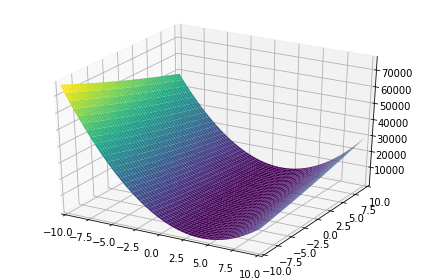

In [ ]:
plotting.plot3d(sum_of_squares)

#### **Overfitting and Variance**
---

Overfitting is basically when your fitting line doesn't generalize and tries to fit the line along the training data outputs. Almost like connecting the dots intuitively by hand. This model is sensitive to outliers, meaning that it would have high variance in predictions. Overfitting increases variance , the predictions are going to be all over the place.

So, in other words overfitting is just Memorization of the training data. The goal here is to find a line that is generalized and able to make predictions outside the training data.

This is why we add bias to a regression model, this is not the same as to bias in the data. Bias in a model means that we prioritise a method as opposed to bending and fitting to exactly what the data says.

Bias in a model counteracts overfitting with underfitting; or fitting less to the training data.

<u>**Ridge Regression**</u>:

It adds a further bias to a linear regression in form of a penalty, therefore causing it to fit less to the data.

<u>**Lasso Regression**</u>: 

Lasso regression attempts to marginalize noisy variables, making it useful when you want to automatically remove variables that might be irrelevent.


It is not OK to think that linear regression with the bias and all isn't overfitting. We have to account for both over and underfitting and mitigate them to find a sweet spot in between the two. If there's none at all then we'd better abandon the model altogether.


#### **Stochastic Gradient Descent**
---

Instead of what we did with the Gradient Descent Example earlier, we feed parts of the data in small batches to introduce different losses so that it doesn't settle on the minimum and better generalizes everything. Because we know that minimizing the loss causes overfitting.

In [ ]:
import pandas as pd
import numpy as np 


data = pd.read_csv("https://bit.ly/2KF29Bd",header=0)
X = data.iloc[:,0].values 
Y = data.iloc[:,1].values 
n = data.shape[0]
m=0.0
b=0.0 
sample_size=1 
L=0.0001
epochs=1_000_000

#performing stochastic gradient descent

for i in range(epochs):
  idx = np.random.choice(n,sample_size,replace=False)
  x_sample=X[idx]
  y_sample=Y[idx]

  Y_pred= m*x_sample + b

  D_m = (-2/sample_size) * sum(x_sample*(y_sample - Y_pred))
  D_b= (-2/sample_size) * sum(y_sample - Y_pred)
  m -= L * D_m
  b -= L * D_b 

  if i % 10000==0:
    print(i,m,b)
print(f"y={m}x+{b}")

0 0.006 0.002
10000 2.3381491975599746 1.8670269677176494
20000 2.2098540282866255 2.8535371862722516
30000 2.103768335275304 3.493744847930194
40000 2.0770252731332532 3.916592177489751
50000 1.9841002997188162 4.1816673704138685
60000 2.0065167512120823 4.371452431205003
70000 1.9613712673333437 4.491929676633182
80000 1.978342040225505 4.58925094227364
90000 1.9426408678465112 4.628695216907329
100000 1.9177765724488058 4.679650551073762
110000 1.9218528508216344 4.698741977619214
120000 1.9774228053612903 4.727715194133889
130000 1.959127855358885 4.7370526923002405
140000 1.9684971598979093 4.712177977105285
150000 1.929287755505995 4.699658346602839
160000 1.9242919755464147 4.702831269005508
170000 1.9403774385454309 4.720986026277786
180000 1.945113493329978 4.708769843433325
190000 1.9460450484210874 4.717357721397226
200000 1.9488277247716765 4.748922894190241
210000 1.9237056278647902 4.771795668792041
220000 1.9135489310100386 4.765823931536096
230000 1.9625218185513396 4.7

#### **Correlation Coefficient**

Also known as Pearson Correlation, which measures the relationship between two variables as a value between -1 to 1. If it is closer to 0, means there are no correlation, if it is closer to 1 means there is a positive correlation, closer to -1 means negative correlation. 

* Denoted as - $r$

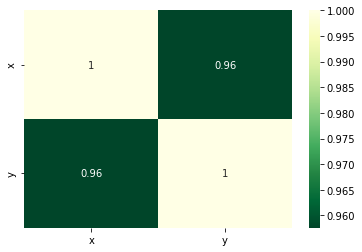

In [ ]:
import pandas as pd
import seaborn as sns
data = pd.read_csv("https://bit.ly/2KF29Bd",delimiter=',')
correlations=data.corr(method='pearson')
sns.heatmap(data=correlations,annot=True,cmap='YlGn_r')

##### **Calculating Correlation Coeffiecient**
---
<br>
\begin{equation}
r = \frac{n∑xy\,-\,(∑x)(∑y)}{{\sqrt{n∑x^2 \,-\,(∑x^2)}}{\sqrt{n∑x^2 \,-\,(∑x^2)}}}
\end{equation}


#### **Statistical Significance**
---

Using hypothesis testing and p-values calculation we can determine whether or not our data correlation is coincidental.
* We are going to find out the correlation between the data and the outcome is not coincidental.

\begin{equation}
H_0 : ρ = 0;(\text{implies no relationship})\\
H_1 : ρ \neq 0;(\text{relationship is present})
\end{equation}


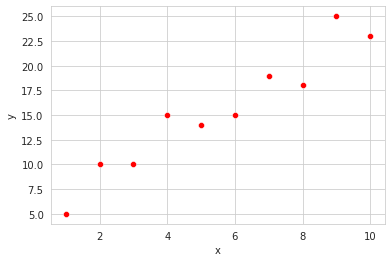

In [ ]:
sns.set_style("whitegrid")
sns.scatterplot(x='x',y='y', data=data,color='red')

In [ ]:
from scipy.stats import t 
n= len(data)
lower_cv = t(n-1).ppf((1-r)/2)  #lower critical value
upper_cv = t(n-1).ppf((1+r)/2) #upper critical value
print(lower_cv,upper_cv) 

-2.398440984714667 2.398440984714667


if our test value falls outside this range of (-2.40,2.40), then we can reject our null hypothesis. For calculation the following formula will be used:

\begin{equation}
\text{test value} =  \frac{r}{\sqrt{\frac{1-r^2}{n-2}}}\\
\text{test value} = \frac{0.96}{\sqrt{\frac{1-0.96^2}{10-2}}}= 9.69746
\end{equation}

if our test value falls outside the critical range of 95% confidence, we accept that our correlation was not by chance.

In [ ]:
from math import sqrt
r = 0.96 

test_value=r/sqrt((1-r**2)/(n-2))
print(f"TEST VALUE:{test_value}")
print(f"CRITICAL RANGE:{lower_cv,upper_cv}")

if test_value<lower_cv or test_value>upper_cv:
  print("CORRELATION PROVEN, REJECT H0")
else:
  print("CORRELATION NOT PROVEN, FAILED TO REJECT H0")

if test_value > 0:
  p_value = 1.0 - t(n-1).cdf(test_value)
else:
  p_value = t(n-1).cdf(test_value)
#two tailed test so multiply by 2
p_value=p_value*2 
print(f"P-VALUE:{p_value}")

TEST VALUE:9.697464427701222
CRITICAL RANGE:(-2.398440984714667, 2.398440984714667)
CORRELATION PROVEN, REJECT H0
P-VALUE:4.618086303365132e-06


#### **Coefficient of Determination**
---
* Denoted by : $r^2$
* Shows how much two variables interect with each other.
* $r$ approaches $-1$ or $1$ on the other hand 👉 $r^2$ approaches $1$.

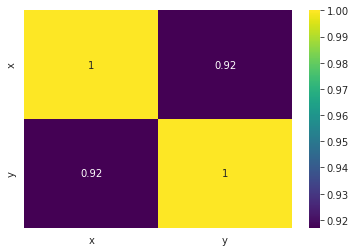

In [ ]:
data = pd.read_csv("https://bit.ly/2KF29Bd",delimiter=',')
coeff_determination=data.corr(method='pearson')**2
sns.heatmap(data=coeff_determination,annot=True,cmap='viridis')

x and y can explain each other 92% of the time and the remaining 8% are the noise.

#### **Standard Error of the Estimate**
---

* $\text{Predicted value:}$ $\hat{y}$

* $\text{Real value:}$ $y$

* $\text{Number of Datapoints:}$ $n$

Standard Squared Error:
\begin{equation}
SSE = ∑(y - \hat{y})^2
\end{equation}

Standard error of the estimate ($S_e$):

\begin{equation}
S_e = \frac{∑(y - \hat{y})^2}{n-2}
\end{equation}

In [ ]:
data = list(data.itertuples()) # datapoints

In [ ]:
n = len(data)
m = 1.939 
b = 4.733 

S_e = sqrt((sum((p.y - (m*p.x +b))**2 for p in data))/(n-2))

print(S_e)

1.87406793500129


#### **Prediction Intervals**
___

When we are looking at a linear regression, we are looking at just the sample of the population. So, our regression line is just as good as our sample. But there's a catch, another variable called the confidence interval is steering the distribution as the mean is shifting continuously along the line. 

Let's continue with the veterinary example again.
I want to predict the age of a dog with 95% confidence based on the veterinary visits it has gone throughout it's life.
How do we calculate this?

We need to get the margin of the error and plus/minus it around the predicted y-value. It involves the critical value from the T-distribution as well as the $S_e$ (standard error) of the estimate.

\begin{equation}
E = t_{0.25} * S_e * \sqrt{1+\frac{1}{n}+{\frac{n(x_0 + \bar{x})^2}{n(\sum{x^2})-(\sum{x})^2}}} 
\end{equation}

* **Example:** *Calculating prediction interval of vet visits for a dog that's 8.5 years old.*

* $x_0$ = 8.5

In [ ]:
import pandas as pd
from scipy.stats import t
from math import sqrt

points =  list(pd.read_csv('https://bit.ly/2KF29Bd',delimiter=',').itertuples())

n = len(points)
m = 1.939
b = 4.733

x_0 =  8.5 
x_mean = sum(p.x for p in points)/len(points) 

t_value = t(n-2).ppf(.975)

standard_error = sqrt(sum((p.y - (m * p.x + b))**2 for p in points)/(n-2))
margin_of_error = t_value * standard_error * sqrt(1+(1/n)+(n*((x_0+x_mean)**2))/(n*(sum(p.x**2 for p in points)-(sum(p.x for p in points))**2)))

predicted_y = m*x_0 + b

print(predicted_y-margin_of_error,predicted_y+margin_of_error)

16.83758836969145 25.591411630308553


It's a way of saying that we're 95% confident that a dog that is 8.5 years old is going to have between 16 to 26 vet visits.

#### **Train Test Split**
___ 
Common practice among machine learning practitoiners is train-test splits.


In [ ]:
import pandas as pd 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
df =pd.read_csv('https://bit.ly/3cIH97A',delimiter=',')

X = df.values[:, :-1] # df.values[all rows,all columns except last column]
Y = df.values[:, -1] # df.values[all rows,last column]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3)

model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Squared Residual:",result)

Squared Residual: 0.9934712547133797


\begin{equation}
r^2 = 1 - \frac{\sum{(y_i-\hat{y_i})^2}}{(y_i-\hat{y_i})^2}
\end{equation}